<a href="https://colab.research.google.com/github/sunnatillo91/ai-datascience/blob/main/05_ml_10_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

###Non-Linear Regression

### Polynomial Regression.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/praktikum_datasets/china_gdp.csv')
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


## Xitoyni Yalpi ichki maxsuloti o'sishini bashorat qilib ko'ramiz

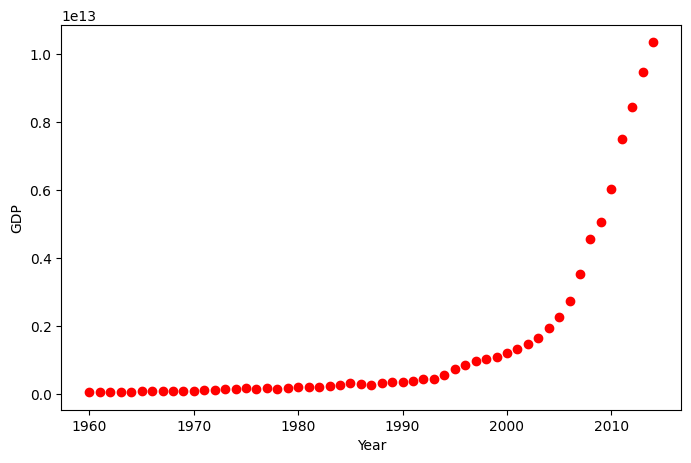

In [5]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Ma'lumotlarni ajratib oliamiz va Normalizatsiya qilamiz

In [7]:
X = np.asanyarray(df[['Year']]/df.Year.max())
y = np.asanyarray(df[['Value']]/df.Value.max())

##Linear Regression ML

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Model train
model.fit(X, y)

LinearRegression()

In [11]:
yhat = model.predict(X)

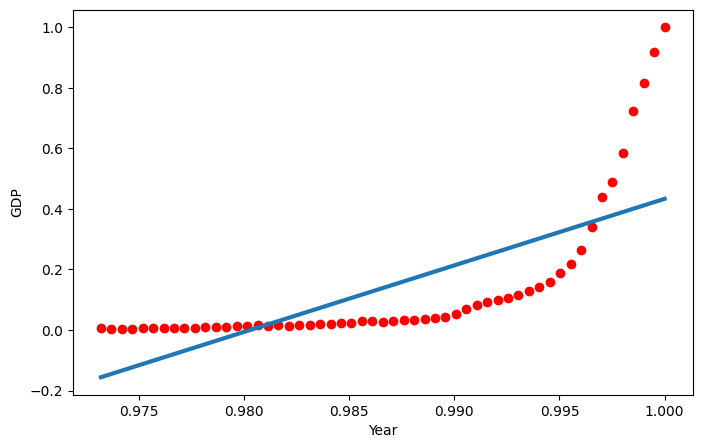

In [12]:
plt.figure(figsize=(8,5))
plt.plot(X, y, 'ro', label='data')
plt.plot(X, yhat, linewidth=3.0, label='fit')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

##Modelni baholaymiz

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(yhat, y)
rmse = np.sqrt(mean_squared_error(yhat, y))

print(f'MAE = {mae}')
print(f'RMSE = {rmse}')

MAE = 0.12657979406214762
RMSE = 0.1650608155199123


In [14]:
X[0]

array([0.97318769])

##Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)  #darajaga 5 berilgani uchun 1dan 5 gacha darajalari hisoblanadi
X_poly = poly_features.fit_transform(X)

In [16]:
X_poly[0]

array([0.97318769, 0.94709427, 0.92170048, 0.89698756, 0.87293725])

In [17]:
model.fit(X_poly, y)

LinearRegression()

In [18]:
yhat = model.predict(X_poly)

Text(0.5, 0, 'Year')

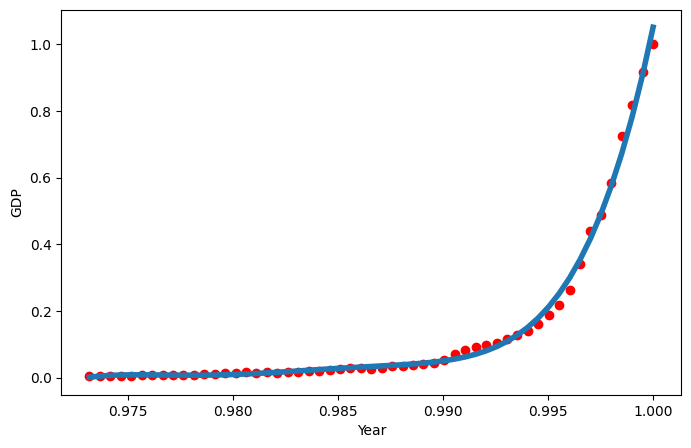

In [19]:
plt.figure(figsize=(8,5))
plt.plot(X, y, 'ro', label='data')
plt.plot(X, yhat, linewidth=4.0, label='fit')
plt.ylabel('GDP')
plt.xlabel('Year')

##Modelni baholaymiz

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(yhat, y)
rmse = np.sqrt(mean_squared_error(yhat, y))

print(f'MAE = {mae}')
print(f'RMSE = {rmse}')

MAE = 0.009253921906050316
RMSE = 0.015193607215305624


##Pipeline

In [22]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=5, include_bias=False)),
    ('model', LinearRegression())])

# polynomial_regression.fit(x_train, y_train)
polynomial_regression.fit(X, yhat)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('model', LinearRegression())])